In [197]:
from numpy import array
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense


In [278]:
# Pickling Call Volume 2018 df
redo_pickle = False

if redo_pickle == True:
    with open('hourly_call_volume_medical_2018.pickle','wb') as f:
        pickle.dump(hourly_call_volume_medical_2018,f)
        
if redo_pickle == False:
    with open('hourly_call_volume_medical_2018.pickle','rb') as f:
        hourly_call_volume_medical_2018 = pickle.load(f)

In [279]:
# Creating 80-20 train-test split
size = int(len(hourly_call_volume_medical_2018) * 0.8)
train, test = hourly_call_volume_medical_2018[0:size], hourly_call_volume_medical_2018[size:]

In [331]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [ ]:
# SARIMA
# Relabeling time series data
X = hourly_call_volume_medical_2018.values #722

# Creating Train-Test split
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

# Accumulator variable assignments
history = [x for x in train]
predictions = list()

# Loop for predicting the next value using previous data
for t in range(len(test)):
    # Instantiating model
    model = SARIMAX(history,order=(3,1,1),
                    seasonal_order=(1,0,1,24),
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    # Training Model
    model_fit = model.fit()
    
    # Predicting one step into future and adding to prediction list
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    
    # Appending actual test observation to train data
    # so that on the next iteration, the model will train 
    # on all previous data and the next time step
    obs = test[t]
    history.append(obs)
    
    # Displaying predicted vs actual values
    print('predicted=%f, expected=%f' % (yhat, obs))

# Calculating and printing MSE for all test predictions    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

In [289]:
# univariate lstm example



# choose a number of time steps
n_steps = 5
# split into samples
X, y = split_sequence(train, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
history = model.fit(X, y, epochs=100, batch_size=128, validation_split=0.25)

Train on 5249 samples, validate on 1750 samples
Epoch 1/100
5249/5249 [==============================] - 3s 583us/step - loss: 79.3527 - val_loss: 33.6932
Epoch 2/100
5249/5249 [==============================] - 0s 46us/step - loss: 27.9518 - val_loss: 24.8178
Epoch 3/100
5249/5249 [==============================] - 0s 46us/step - loss: 22.2792 - val_loss: 20.1021
Epoch 4/100
5249/5249 [==============================] - 0s 47us/step - loss: 20.2741 - val_loss: 18.8595
Epoch 5/100
5249/5249 [==============================] - 0s 46us/step - loss: 19.7347 - val_loss: 18.6046
Epoch 6/100
5249/5249 [==============================] - 0s 46us/step - loss: 19.3597 - val_loss: 18.1479
Epoch 7/100
5249/5249 [==============================] - 0s 45us/step - loss: 20.0079 - val_loss: 18.2820
Epoch 8/100
5249/5249 [==============================] - 0s 46us/step - loss: 19.4365 - val_loss: 18.5357
Epoch 9/100
5249/5249 [==============================] - 0s 46us/step - loss: 19.0269 - val_loss: 17.77

5249/5249 [==============================] - 0s 48us/step - loss: 18.3621 - val_loss: 17.2106
Epoch 78/100
5249/5249 [==============================] - 0s 45us/step - loss: 18.4205 - val_loss: 17.2914
Epoch 79/100
5249/5249 [==============================] - 0s 46us/step - loss: 18.3240 - val_loss: 17.2730
Epoch 80/100
5249/5249 [==============================] - 0s 46us/step - loss: 18.3267 - val_loss: 17.5410
Epoch 81/100
5249/5249 [==============================] - 0s 47us/step - loss: 18.6730 - val_loss: 17.2742
Epoch 82/100
5249/5249 [==============================] - 0s 45us/step - loss: 19.6570 - val_loss: 17.4184
Epoch 83/100
5249/5249 [==============================] - 0s 46us/step - loss: 18.9102 - val_loss: 17.4094
Epoch 84/100
5249/5249 [==============================] - 0s 46us/step - loss: 18.5381 - val_loss: 17.3495
Epoch 85/100
5249/5249 [==============================] - 0s 46us/step - loss: 18.5828 - val_loss: 17.5847
Epoch 86/100
5249/5249 [==========================

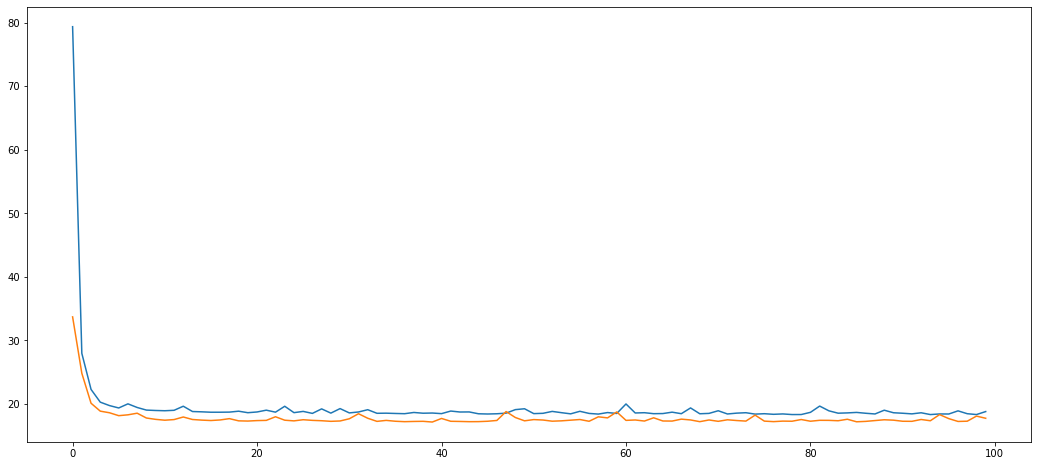

In [290]:
# Train and validation set mse (checking for overfitting)
plt.figure(figsize=(18,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [292]:
# Retraining on all 80%

# split into samples
X, y = split_sequence(train, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
history = model.fit(X, y, batch_size=128, epochs=100)

Epoch 1/100
6999/6999 [==============================] - 3s 400us/step - loss: 89.2061
Epoch 2/100
6999/6999 [==============================] - 0s 41us/step - loss: 26.7901
Epoch 3/100
6999/6999 [==============================] - 0s 41us/step - loss: 20.3927
Epoch 4/100
6999/6999 [==============================] - 0s 41us/step - loss: 19.0175
Epoch 5/100
6999/6999 [==============================] - 0s 42us/step - loss: 18.7560
Epoch 6/100
6999/6999 [==============================] - 0s 43us/step - loss: 18.7266
Epoch 7/100
6999/6999 [==============================] - 0s 42us/step - loss: 18.6523
Epoch 8/100
6999/6999 [==============================] - 0s 40us/step - loss: 18.4850
Epoch 9/100
6999/6999 [==============================] - 0s 41us/step - loss: 18.4917
Epoch 10/100
6999/6999 [==============================] - 0s 42us/step - loss: 18.4052
Epoch 11/100
6999/6999 [==============================] - 0s 41us/step - loss: 18.3889
Epoch 12/100
6999/6999 [===========================

6999/6999 [==============================] - 0s 46us/step - loss: 17.8935
Epoch 96/100
6999/6999 [==============================] - 0s 44us/step - loss: 17.9035
Epoch 97/100
6999/6999 [==============================] - 0s 44us/step - loss: 17.9977
Epoch 98/100
6999/6999 [==============================] - 0s 44us/step - loss: 18.0663
Epoch 99/100
6999/6999 [==============================] - 0s 44us/step - loss: 18.1066
Epoch 100/100
6999/6999 [==============================] - 0s 44us/step - loss: 17.9480


In [330]:
# Creating prediction for test set
predictions = []
for i in range(size,len(hourly_call_volume_medical_2018)-5):
    x_input = array(hourly_call_volume_medical_2018.values[i:i+5])
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    print(i,yhat)
    predictions.append(yhat)
predictions = array(predictions).reshape((1747))

ValueError: cannot reshape array of size 7009 into shape (7009,5,1)

In [324]:
# Calculating and printing MSE for all test predictions    
error = mean_squared_error(test[5:],predictions)
print('Test MSE: %.3f' % error)

Test MSE: 18.689


In [327]:
test.head()

Hourly_DtTm
2018-10-19 23:00:00    13
2018-10-20 00:00:00     8
2018-10-20 01:00:00     3
2018-10-20 02:00:00    15
2018-10-20 03:00:00    11
Name: Call Number, dtype: int64

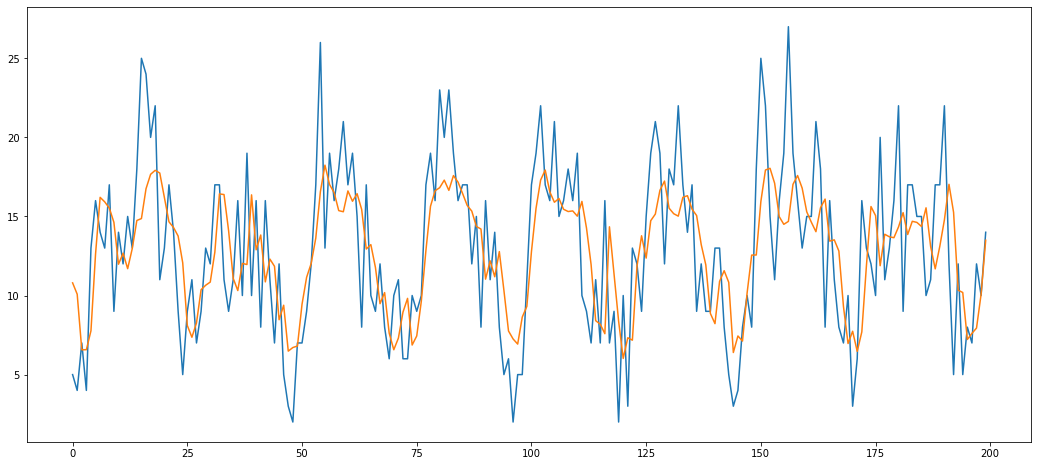

In [326]:
# Prediction
plt.figure(figsize=(18,8))
sns.lineplot(data=test[5:].values[:200])
sns.lineplot(data=predictions[:200]);

In [ ]:
# check residuals for nonlinear trend then it will show if you need to use an rnn

In [269]:
len(train)

7004

In [256]:
len(hourly_call_volume_medical_2018.values[size:])

1752

In [255]:
size

7004

In [301]:
len(predictions)

1747

In [302]:
len(test)

1752

In [303]:
test

Hourly_DtTm
2018-10-19 23:00:00    13
2018-10-20 00:00:00     8
2018-10-20 01:00:00     3
2018-10-20 02:00:00    15
2018-10-20 03:00:00    11
2018-10-20 04:00:00     5
2018-10-20 05:00:00     4
2018-10-20 06:00:00     7
2018-10-20 07:00:00     4
2018-10-20 08:00:00    13
2018-10-20 09:00:00    16
2018-10-20 10:00:00    14
2018-10-20 11:00:00    13
2018-10-20 12:00:00    17
2018-10-20 13:00:00     9
2018-10-20 14:00:00    14
2018-10-20 15:00:00    12
2018-10-20 16:00:00    15
2018-10-20 17:00:00    13
2018-10-20 18:00:00    18
2018-10-20 19:00:00    25
2018-10-20 20:00:00    24
2018-10-20 21:00:00    20
2018-10-20 22:00:00    22
2018-10-20 23:00:00    11
2018-10-21 00:00:00    13
2018-10-21 01:00:00    17
2018-10-21 02:00:00    14
2018-10-21 03:00:00     9
2018-10-21 04:00:00     5
                       ..
2018-12-30 18:00:00    13
2018-12-30 19:00:00     5
2018-12-30 20:00:00    11
2018-12-30 21:00:00    11
2018-12-30 22:00:00     8
2018-12-30 23:00:00     7
2018-12-31 00:00:00     8


In [304]:
predictions

array([10.800496, 10.083874,  6.564781, ..., 15.190678, 16.466711,
       15.170623], dtype=float32)